In [98]:
#imports
import pandas as pd
import json
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import ast
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from matplotlib.ticker import FuncFormatter, MultipleLocator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bokchoe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
df = pd.read_csv('location_output_WITH_LONG_LATS_AND_COUNTY.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,position_section,position_subsection,hl1,hl2,author,lede,body,...,indexing_terms,year,actual_body_word_count,body_cleaned,llama_pred,span_NER_pred,NER_Filtered,TRACT_LIST,COUNTY_LIST,LONG_LAT
0,0,0,0,LIVING ARTS,unknown,greater boston author readings nov. 13-19,unknown,unknown,"sunday katrina kenison (""moments of seeing: re...","monday john simpson (""the word detective: sear...",...,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,359,monday john simpson ( `` word detective : sear...,Based on the information provided in the hea...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('Fenway', 'LOC')]",['010403'],['025'],"[-71.08902, 42.34639]"
1,1,1,1,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,it's unacceptable that women's college hockey ...,...,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,Based on the information provided in the art...,"[(Boston, 'GPE'), (Allston, 'LOC'), (1, 'CARDI...","[('Harvard Avenue', 'FAC'), ('Brighton Avenue'...",['091900'],['025'],"[-71.0752433333333, 42.29987]"
2,2,2,2,MAGAZINE,unknown,top 5 places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,> 25 degrees — average temperature across new ...,...,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,Based on the information provided in the art...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...","[('The North End', 'LOC')]",[],['NO COUNTY'],"[-73.1629703333333, 41.1946496666667]"
3,3,3,3,SUNDAY,Travel,home design with art in mind,unknown,unknown,the restored sunken garden at hill-stead in fa...,"hill-stead, pope's 33,000-square-foot colonial...",...,"{'subject': [{'score': '90', 'classCode': 'N71...",2016,794,"hill- stead , pope ' 33 , 000- square- foot co...",Based on the information provided in the art...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('South End', 'LOC')]",['070700'],['025'],"[-71.078194, 42.344623]"
4,4,4,4,NEWS,Metro,at least the hens won,unknown,unknown,"well, i'm happy for the chickens. since tuesda...",earlier this year i went to visit the country ...,...,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,562,earlier year went visit country hen hubbardsto...,Based on the information provided in the art...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Fenway Park', 'FAC'), ('Boston Red Sox', 'O...",['010206'],['025'],"[-71.0975175, 42.3463355]"


In [100]:
indexes = df['indexing_terms']
df['keywords'] = 'unknown'

for index in range(len(indexes)):
    try:
        keywords = ""
        x = indexes[index].replace("'", "\"")
        res = json.loads(x)
        first_key = list(res.keys())[0]
        subjects = res[first_key]
        for subject in subjects:
            keyword = subject['className']
            keywords += keyword + " "
        df.at[index, 'keywords'] = keywords
    except:
        print(index)

20
34
35
39
50
88
89
116
187
195
209
243
245
295
297
308
320
321
337
362
370
387
389
490
515
516
528
539
550
569
611
623
639
646
653
662
680
709
765
769
795
814
820
823
864
889
905
914
916
971
974
990
995
996
1010
1012
1014
1050
1064
1098
1116
1119
1163
1168
1186
1201
1211
1221
1225
1236
1252
1260
1267
1289
1360
1403
1410


In [101]:
df = df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,llama_pred,span_NER_pred,NER_Filtered,TRACT_LIST,COUNTY_LIST,LONG_LAT,keywords
0,LIVING ARTS,unknown,greater boston author readings nov. 13-19,unknown,unknown,"sunday katrina kenison (""moments of seeing: re...","monday john simpson (""the word detective: sear...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,359,monday john simpson ( `` word detective : sear...,Based on the information provided in the hea...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('Fenway', 'LOC')]",['010403'],['025'],"[-71.08902, 42.34639]",LITERATURE WRITERS BOOKSTORES POP & ROCK SUPRE...
1,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,it's unacceptable that women's college hockey ...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,Based on the information provided in the art...,"[(Boston, 'GPE'), (Allston, 'LOC'), (1, 'CARDI...","[('Harvard Avenue', 'FAC'), ('Brighton Avenue'...",['091900'],['025'],"[-71.0752433333333, 42.29987]",COLLEGE & UNIVERSITY SPORTS WINTER SPORTS RANK...
2,MAGAZINE,unknown,top 5 places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,> 25 degrees — average temperature across new ...,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,Based on the information provided in the art...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...","[('The North End', 'LOC')]",[],['NO COUNTY'],"[-73.1629703333333, 41.1946496666667]",DESTINATIONS & ATTRACTIONS HOTELS & MOTELS CON...
3,SUNDAY,Travel,home design with art in mind,unknown,unknown,the restored sunken garden at hill-stead in fa...,"hill-stead, pope's 33,000-square-foot colonial...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'N71...",2016,794,"hill- stead , pope ' 33 , 000- square- foot co...",Based on the information provided in the art...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('South End', 'LOC')]",['070700'],['025'],"[-71.078194, 42.344623]",MUSEUMS & GALLERIES ART COLLECTING ARCHITECTUR...
4,NEWS,Metro,at least the hens won,unknown,unknown,"well, i'm happy for the chickens. since tuesda...",earlier this year i went to visit the country ...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,562,earlier year went visit country hen hubbardsto...,Based on the information provided in the art...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Fenway Park', 'FAC'), ('Boston Red Sox', 'O...",['010206'],['025'],"[-71.0975175, 42.3463355]",US PRESIDENTIAL CANDIDATES 2016 US PRESIDENTIA...


In [102]:
# function to calculate sentiment score
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    if pd.isna(text):
        return "unknown"
    else:
        return sia.polarity_scores(text)['compound']
# keyword sentiment
df['keyword_sentiment'] = 'unknown'
for index in range(len(df)):
    keyword = df.at[index, 'keywords']
    sentiment = get_sentiment_score(keyword)
    df.at[index, 'keyword_sentiment'] = sentiment
# hl1 sentiment
df['hl1_sentiment'] = df['hl1'].apply(get_sentiment_score)
# body sentiment
df['body_sentiment'] = df['body_cleaned'].apply(get_sentiment_score)
df.head(3)

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,...,llama_pred,span_NER_pred,NER_Filtered,TRACT_LIST,COUNTY_LIST,LONG_LAT,keywords,keyword_sentiment,hl1_sentiment,body_sentiment
0,LIVING ARTS,unknown,greater boston author readings nov. 13-19,unknown,unknown,"sunday katrina kenison (""moments of seeing: re...","monday john simpson (""the word detective: sear...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,...,Based on the information provided in the hea...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('Fenway', 'LOC')]",['010403'],['025'],"[-71.08902, 42.34639]",LITERATURE WRITERS BOOKSTORES POP & ROCK SUPRE...,0.5574,0.3612,0.9370
1,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,it's unacceptable that women's college hockey ...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,...,Based on the information provided in the art...,"[(Boston, 'GPE'), (Allston, 'LOC'), (1, 'CARDI...","[('Harvard Avenue', 'FAC'), ('Brighton Avenue'...",['091900'],['025'],"[-71.0752433333333, 42.29987]",COLLEGE & UNIVERSITY SPORTS WINTER SPORTS RANK...,0.4588,-0.1280,0.9964
2,MAGAZINE,unknown,top 5 places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,> 25 degrees — average temperature across new ...,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,...,Based on the information provided in the art...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...","[('The North End', 'LOC')]",[],['NO COUNTY'],"[-73.1629703333333, 41.1946496666667]",DESTINATIONS & ATTRACTIONS HOTELS & MOTELS CON...,0.4215,0.5106,-0.5719


In [103]:
#neighborhoods
hyde_park =['980700', '140102', '140107', '140105', '140201', '140202', '140300', '140400']
west_roxbury = ['980900', '981900', '130101', '130402', '130200', '130404', '130406', '130300', '110601']
roslindale = ['110607', '110501', '140106', '110502', '110403', '110401', '110104', '110301', '110201']
mattapan = ['101001', '101002', '100900', '101102', '101101', '981100']
dorchester = ['092400', '100100', '100200', '100300','100400', '100500', '100800','100700','100603','100601','09220','092300','090100','091900',
              '092000','092101','090200','090300','091800','091700','091600','091500', '091400','091001','090901','091100','091200','091300','090700']
jamacia_plain = ['120105','981000','120104','110106','110105','120201','120103','981800','120400','120301','120600','120500','081301','081200','120700','081101']
roxbury = ['980300', '082100','082000','081900','081302','081500','081700','081800','090400','090600','081400','080300','080601','080401','080100','080500','070901','070801']
south_end = ['070700','070802','070902','070502','070600','071101','071201','070501','070301','070402','70302','70201']
south_boston = ['061202','061201','061101','061000','061203','060700','060800','060601','060400','060301','060501','060200','060101']
mission_hill = ['081102','080900','081001','080801']
longwood = ['010300']
fenway= ['010103','010204','010205','010408','010206','010104','010403','010404','010405']
allston = ['000807','000805','000806','000804','000101','000703','000704','000604']
brighton = ['000701', '000601', '000102','000603','000505','000506','000503','000502','000401','000402','000302','000301','000201','000202']
back_bay =['010802','010701','010500','010600','010702','010801']
beacon_hill = ['020200', '020101','981700','070102','020302']
west_end = ['020301','020304','020305']
downtown = ['030302','070104']
chinatown = ['070103','070202']
harbor_islands = ['980101']
boston_waterfront = ['061204','060602','060604','060603','981202']
east_boston = ['981300','051200','050400','050300','050600','050500','050700','050200','050101', '050901','051000','051101','981600',]

neighborhood_mapping = {
    'Hyde Park': hyde_park,
    'West Roxbury': west_roxbury,
    'Roslindale': roslindale,
    'Mattapan': mattapan,
    'Dorchester': dorchester,
    'Jamaica Plain': jamacia_plain,
    'Roxbury': roxbury,
    'South End': south_end,
    'South Boston': south_boston,
    'Mission Hill': mission_hill,
    'Longwood': longwood,
    'Fenway': fenway,
    'Allston': allston,
    'Brighton': brighton,
    'Back Bay': back_bay,
    'Beacon Hill': beacon_hill,
    'West End': west_end,
    'Downtown': downtown,
    'Chinatown': chinatown,
    'Harbor Islands': harbor_islands,
    'S. Boston Waterfront': boston_waterfront,
    'East Boston': east_boston
}

In [104]:
# Reversed neighborhood_mapping dictionary
reversed_neighborhood_mapping = {tract: neighborhood for neighborhood, tract_list in neighborhood_mapping.items() for tract in tract_list}

# Display the reversed neighborhood_mapping dictionary
print(reversed_neighborhood_mapping)


{'980700': 'Hyde Park', '140102': 'Hyde Park', '140107': 'Hyde Park', '140105': 'Hyde Park', '140201': 'Hyde Park', '140202': 'Hyde Park', '140300': 'Hyde Park', '140400': 'Hyde Park', '980900': 'West Roxbury', '981900': 'West Roxbury', '130101': 'West Roxbury', '130402': 'West Roxbury', '130200': 'West Roxbury', '130404': 'West Roxbury', '130406': 'West Roxbury', '130300': 'West Roxbury', '110601': 'West Roxbury', '110607': 'Roslindale', '110501': 'Roslindale', '140106': 'Roslindale', '110502': 'Roslindale', '110403': 'Roslindale', '110401': 'Roslindale', '110104': 'Roslindale', '110301': 'Roslindale', '110201': 'Roslindale', '101001': 'Mattapan', '101002': 'Mattapan', '100900': 'Mattapan', '101102': 'Mattapan', '101101': 'Mattapan', '981100': 'Mattapan', '092400': 'Dorchester', '100100': 'Dorchester', '100200': 'Dorchester', '100300': 'Dorchester', '100400': 'Dorchester', '100500': 'Dorchester', '100800': 'Dorchester', '100700': 'Dorchester', '100603': 'Dorchester', '100601': 'Dorche

In [105]:
s = [x.replace("[", "").replace("]", "").replace('"', '') for x in df['TRACT_LIST']]
query = [x.strip("'") for x in s]
query
df['clean_tract'] = query
df.head(3)

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,...,span_NER_pred,NER_Filtered,TRACT_LIST,COUNTY_LIST,LONG_LAT,keywords,keyword_sentiment,hl1_sentiment,body_sentiment,clean_tract
0,LIVING ARTS,unknown,greater boston author readings nov. 13-19,unknown,unknown,"sunday katrina kenison (""moments of seeing: re...","monday john simpson (""the word detective: sear...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,...,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('Fenway', 'LOC')]",['010403'],['025'],"[-71.08902, 42.34639]",LITERATURE WRITERS BOOKSTORES POP & ROCK SUPRE...,0.5574,0.3612,0.9370,010403
1,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,it's unacceptable that women's college hockey ...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,...,"[(Boston, 'GPE'), (Allston, 'LOC'), (1, 'CARDI...","[('Harvard Avenue', 'FAC'), ('Brighton Avenue'...",['091900'],['025'],"[-71.0752433333333, 42.29987]",COLLEGE & UNIVERSITY SPORTS WINTER SPORTS RANK...,0.4588,-0.1280,0.9964,091900
2,MAGAZINE,unknown,top 5 places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,> 25 degrees — average temperature across new ...,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,...,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...","[('The North End', 'LOC')]",[],['NO COUNTY'],"[-73.1629703333333, 41.1946496666667]",DESTINATIONS & ATTRACTIONS HOTELS & MOTELS CON...,0.4215,0.5106,-0.5719,


In [106]:
x =[]
for row in df['clean_tract']:
    if row in reversed_neighborhood_mapping:
        x.append(reversed_neighborhood_mapping[row])
    else:
        x.append(0)
print(x)

['Fenway', 'Dorchester', 0, 'South End', 'Fenway', 0, 'Fenway', 'Downtown', 'South End', 'Roxbury', 0, 'West End', 'Downtown', 'Beacon Hill', 'Fenway', 0, 0, 0, 'Beacon Hill', 0, 0, 0, 0, 0, 'Dorchester', 'Beacon Hill', 0, 0, 'South Boston', 'West End', 'Downtown', 'East Boston', 'Fenway', 'Jamaica Plain', 'South Boston', 'Dorchester', 'Jamaica Plain', 'South End', 'West Roxbury', 0, 'Fenway', 'Downtown', 0, 0, 'South End', 'South Boston', 0, 'South Boston', 'South End', 0, 'East Boston', 'Chinatown', 'South End', 'Fenway', 'South End', 'Downtown', 0, 'Roxbury', 'Downtown', 'Fenway', 0, 'South Boston', 'West Roxbury', 'Beacon Hill', 'West End', 0, 'Fenway', 'Beacon Hill', 'S. Boston Waterfront', 'South Boston', 0, 'Fenway', 0, 0, 'South Boston', 'Fenway', 0, 'Fenway', 'Brighton', 'East Boston', 0, 'Harbor Islands', 'Fenway', 'Fenway', 'Back Bay', 0, 'Fenway', 'South Boston', 'Beacon Hill', 0, 'Roxbury', 'Beacon Hill', 'Longwood', 'Fenway', 'Fenway', 0, 'Beacon Hill', 'Fenway', 'Beacon 

In [107]:
df['neighborhood'] = x
df.head(3)

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,...,NER_Filtered,TRACT_LIST,COUNTY_LIST,LONG_LAT,keywords,keyword_sentiment,hl1_sentiment,body_sentiment,clean_tract,neighborhood
0,LIVING ARTS,unknown,greater boston author readings nov. 13-19,unknown,unknown,"sunday katrina kenison (""moments of seeing: re...","monday john simpson (""the word detective: sear...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,...,"[('Fenway', 'LOC')]",['010403'],['025'],"[-71.08902, 42.34639]",LITERATURE WRITERS BOOKSTORES POP & ROCK SUPRE...,0.5574,0.3612,0.9370,010403,Fenway
1,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,it's unacceptable that women's college hockey ...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,...,"[('Harvard Avenue', 'FAC'), ('Brighton Avenue'...",['091900'],['025'],"[-71.0752433333333, 42.29987]",COLLEGE & UNIVERSITY SPORTS WINTER SPORTS RANK...,0.4588,-0.1280,0.9964,091900,Dorchester
2,MAGAZINE,unknown,top 5 places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,> 25 degrees — average temperature across new ...,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,...,"[('The North End', 'LOC')]",[],['NO COUNTY'],"[-73.1629703333333, 41.1946496666667]",DESTINATIONS & ATTRACTIONS HOTELS & MOTELS CON...,0.4215,0.5106,-0.5719,,0


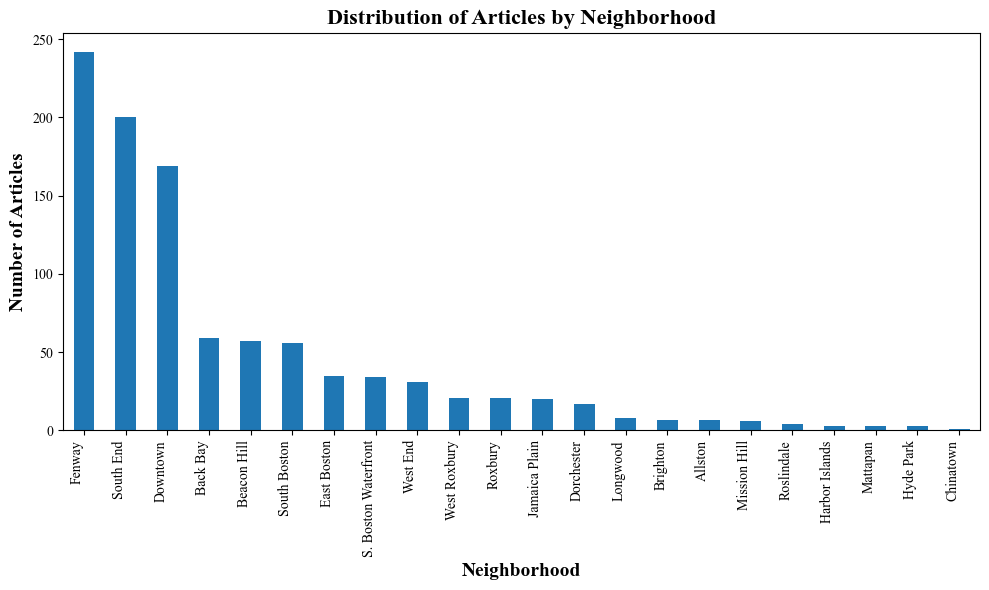

In [108]:

neighborhood_counts = df['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.drop([0], errors='ignore')

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Distribution of Articles by Neighborhood',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xlabel('Neighborhood',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Number of Articles',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(rotation=90, ha='right',fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('articles_by_neighborhood', transparent = True)
plt.show()